In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils import *
from utils.kabsch2D import *
from nsd_access import NSDAccess 
from scipy import stats
from utils.flips import create_rotation_df, get_ranking, get_rank_dict,get_distances
from utils.stats import rank_correlation, parametric_test, wilcoxon_test, plot_colorcoded
from scipy.spatial.distance import pdist

## This notebook was used to find which ROI to rotate to, which was also tested using a Wilcoxon test 

In [2]:
def all_subj_rank(dict, rois, random=True):
    """
    Take the dictionary containing the ranking for all participants and 
    return one final ranking, that is simply the sum of all rankings
    """
    if random:
        rank_total = np.zeros(len(rois) + 1)
    else:
        rank_total = np.zeros(len(rois))
    for i in range(len(dict)):
        rank_total += list(dict.values())[i]
    return rank_total

In [3]:
random= True # compare to random, False is broken for now 
rank_dict, rank_dict_values = get_rank_dict(subj_list, rois, random=random, mode='train')

In [4]:
# Find the shortest disctance between all MDS when rotating to each 

# Here, VO-1 is the shortest; thus we use VO-1 as our target to rotated to
rank_total = all_subj_rank(rank_dict_values, rois)
rank_total.sort_values()

source
VO-1      5.134504
VO-2      5.220071
V3        5.264391
hV4       5.350147
PHC-2     5.370985
LO-1      5.381541
PHC-1     5.422336
TO-2      5.452441
V1        5.478031
LO-2      5.484546
V2        5.491694
TO-1      5.709095
random    6.897171
Name: distance, dtype: float64

In [5]:
rank_dict_values_norm = {key : (value) / (value.max()) for key, value in rank_dict_values.items()} #normalize with random
print(rank_dict_values_norm)
rank_total_norm = all_subj_rank(rank_dict_values_norm, rois)
print(rank_total_norm.sort_values()) 

# Normalized best target for each subject

{'subj01': source
VO-2      0.778605
hV4       0.782447
PHC-2     0.790272
VO-1      0.798067
V2        0.808884
V1        0.812939
PHC-1     0.817670
V3        0.818235
LO-1      0.820337
TO-2      0.834086
LO-2      0.849313
TO-1      0.876706
random    1.000000
Name: distance, dtype: float32, 'subj02': source
VO-1      0.762275
LO-1      0.770523
PHC-2     0.786150
V3        0.789874
TO-2      0.790313
LO-2      0.792152
TO-1      0.795175
hV4       0.797215
V1        0.798223
VO-2      0.804152
V2        0.820595
PHC-1     0.865566
random    1.000000
Name: distance, dtype: float32, 'subj03': source
VO-2      0.712154
V3        0.713164
VO-1      0.722817
TO-2      0.724674
PHC-1     0.726010
LO-1      0.742077
V1        0.742728
hV4       0.749073
V2        0.755571
PHC-2     0.768159
LO-2      0.793802
TO-1      0.823748
random    1.000000
Name: distance, dtype: float32, 'subj04': source
VO-1      0.742009
PHC-2     0.744215
LO-1      0.754868
LO-2      0.755761
PHC-1     0.760472

## WILCOXON TEST 

## Compared the difference obtained for rotated all ROIs to MDS A and the ones obtained from rotating to MDS B. So, for example, the z=0.786591 obtained in [0,1] is the z value for the difference between distances elicited in all ROI when rotating to V1 compared to when rotating to V1, excluding the two targets

In [6]:
z_values_df_W, p_values_df_W, median_df_W = wilcoxon_test(subj_list, rois, mode='train')
z_values_df_W # check z values 

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
V1,0,0.786591,2.796235,-0.03837,4.014492,1.913719,1.021609,1.553997,-0.436462,-0.115111,-0.80098,0.249407
V2,-0.786591,0,1.971274,1.09835,3.016865,2.887365,0.431666,1.247035,0.330944,-0.330944,-0.872924,-0.259
V3,-2.796235,-1.971274,0,-1.462868,2.187107,-0.028778,-1.482053,0.172666,-0.997628,-1.347757,-2.004848,-1.381331
hV4,0.03837,-1.09835,1.462868,0,2.44131,2.426921,0.450851,0.652295,-0.139092,-0.681073,-1.218257,-0.585147
VO-1,-4.014492,-3.016865,-2.187107,-2.44131,0,-0.988035,-1.8082,-0.431666,-1.232646,-1.611552,-2.239866,-2.206292
VO-2,-1.913719,-2.887365,0.028778,-2.426921,0.988035,0,0.978443,-0.239814,-1.184683,-1.592367,-2.163126,-1.904126
PHC-1,-1.021609,-0.431666,1.482053,-0.450851,1.8082,-0.978443,0,1.050387,-0.527592,-0.853739,-1.573182,-1.112739
PHC-2,-1.553997,-1.247035,-0.172666,-0.652295,0.431666,0.239814,-1.050387,0,-2.690717,-3.275864,-4.849046,-2.119959
LO-1,0.436462,-0.330944,0.997628,0.139092,1.232646,1.184683,0.527592,2.690717,0,-2.153533,-3.208716,-0.93048
LO-2,0.115111,0.330944,1.347757,0.681073,1.611552,1.592367,0.853739,3.275864,2.153533,0,-1.184683,0.100722


In [3]:
median_df_W


,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
V1,0,0.012716,0.02358,-0.012048,0.036895,0.008336,0.017559,0.015603,-0.002082,-0.010055,-0.025534,0.015002
V2,-0.012716,0,0.011913,0.006662,0.029208,0.021916,0.01217,0.032893,0.007435,-0.011122,-0.01873,-0.009268
V3,-0.02358,-0.011913,0,-0.016726,0.011733,-0.004303,-0.007307,0.003774,-0.022177,-0.053623,-0.0557,-0.009243
hV4,0.012048,-0.006662,0.016726,0,0.030945,0.011323,0.023196,0.017745,-0.003936,-0.020787,-0.029377,-0.000517
VO-1,-0.036895,-0.029208,-0.011733,-0.030945,0,-0.022621,-0.024958,-0.012801,-0.021965,-0.024649,-0.0427,-0.024048
VO-2,-0.008336,-0.021916,0.004303,-0.011323,0.022621,0,0.002216,-0.016967,-0.036265,-0.043782,-0.065132,-0.019133
PHC-1,-0.017559,-0.01217,0.007307,-0.023196,0.024958,-0.002216,0,0.005369,-0.024264,-0.031319,-0.026865,-0.020551
PHC-2,-0.015603,-0.032893,-0.003774,-0.017745,0.012801,0.016967,-0.005369,0,-0.025046,-0.032365,-0.041776,-0.014834
LO-1,0.002082,-0.007435,0.022177,0.003936,0.021965,0.036265,0.024264,0.025046,0,-0.01481,-0.011056,-0.003768
LO-2,0.010055,0.011122,0.053623,0.020787,0.024649,0.043782,0.031319,0.032365,0.01481,0,-0.003321,0.020095


In [4]:
p_values_df_W

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
V1,1,0.431521,0.00517,0.969392,0.00006,0.055656,0.306966,0.120185,0.662501,0.908357,0.423143,0.803046
V2,0.431521,1,0.048693,0.272052,0.002554,0.003885,0.665984,0.212385,0.740687,0.740687,0.382704,0.795636
V3,0.00517,0.048693,1,0.143504,0.028735,0.977042,0.138326,0.862914,0.31846,0.177737,0.044979,0.167177
hV4,0.969392,0.272052,0.143504,1,0.014634,0.015228,0.652097,0.514211,0.889377,0.495825,0.223126,0.558449
VO-1,0.00006,0.002554,0.028735,0.014634,1,0.323135,0.070575,0.665984,0.217708,0.107059,0.0251,0.027364
VO-2,0.055656,0.003885,0.977042,0.015228,0.323135,1,0.327855,0.810474,0.236143,0.111302,0.030532,0.056894
PHC-1,0.306966,0.665984,0.138326,0.652097,0.070575,0.327855,1,0.29354,0.597783,0.39325,0.115677,0.265821
PHC-2,0.120185,0.212385,0.862914,0.514211,0.665984,0.810474,0.29354,1,0.00713,0.001053,0.000001,0.03401
LO-1,0.662501,0.740687,0.31846,0.889377,0.217708,0.236143,0.597783,0.00713,1,0.031277,0.001333,0.352123
LO-2,0.908357,0.740687,0.177737,0.495825,0.107059,0.111302,0.39325,0.001053,0.031277,1,0.236143,0.919771


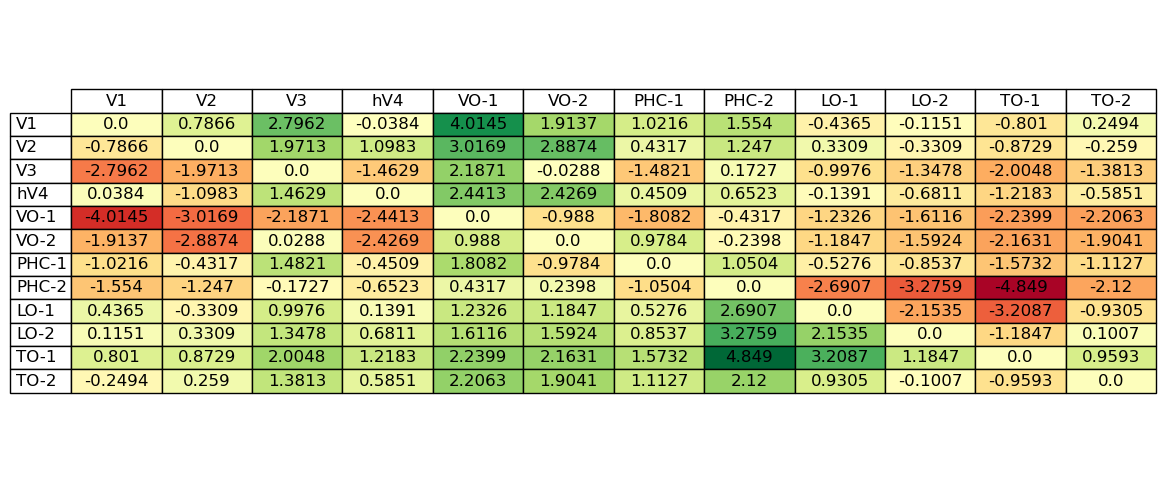

In [13]:
df = z_values_df_W.apply(pd.to_numeric)
norm = plt.Normalize(df.values.min()-0.1, df.values.max())

# Create a custom colormap
cmap = plt.get_cmap('RdYlGn')

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create a table with colored cells
cell_colors = cmap(norm(df.values))

# Add table to the axes
table = ax.table(cellText=df.values.round(4),
                 rowLabels=df.index,
                 colLabels=df.columns,
                 cellColours=cell_colors,
                 cellLoc='center',
                 loc='center')

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.4, 1.4)
plt.savefig('table_z_rotation_mds.png', bbox_inches='tight')
# Display the plotS
plt.show()